## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Regressor (Boston) - Default

In [2]:
# load boston dataset
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# build decision tree
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [3]:
# MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 29.05


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [6.50872305e-02 1.52614463e-03 1.04167966e-02 5.16062560e-05
 2.86335282e-02 5.42611933e-01 1.40532692e-02 6.75585441e-02
 5.94391667e-04 1.17493633e-02 2.44151122e-02 1.17118393e-02
 2.21590241e-01]


### Classifier (Breast Cancer) - Default

In [6]:
# load breast cancer dataset
cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=4)

# build decision tree
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8811188811188811


In [8]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00991435 0.         0.
 0.         0.00494089 0.         0.         0.         0.
 0.00941052 0.         0.         0.06588009 0.75416545 0.05724408
 0.05147346 0.         0.0092534  0.03771776 0.         0.        ]


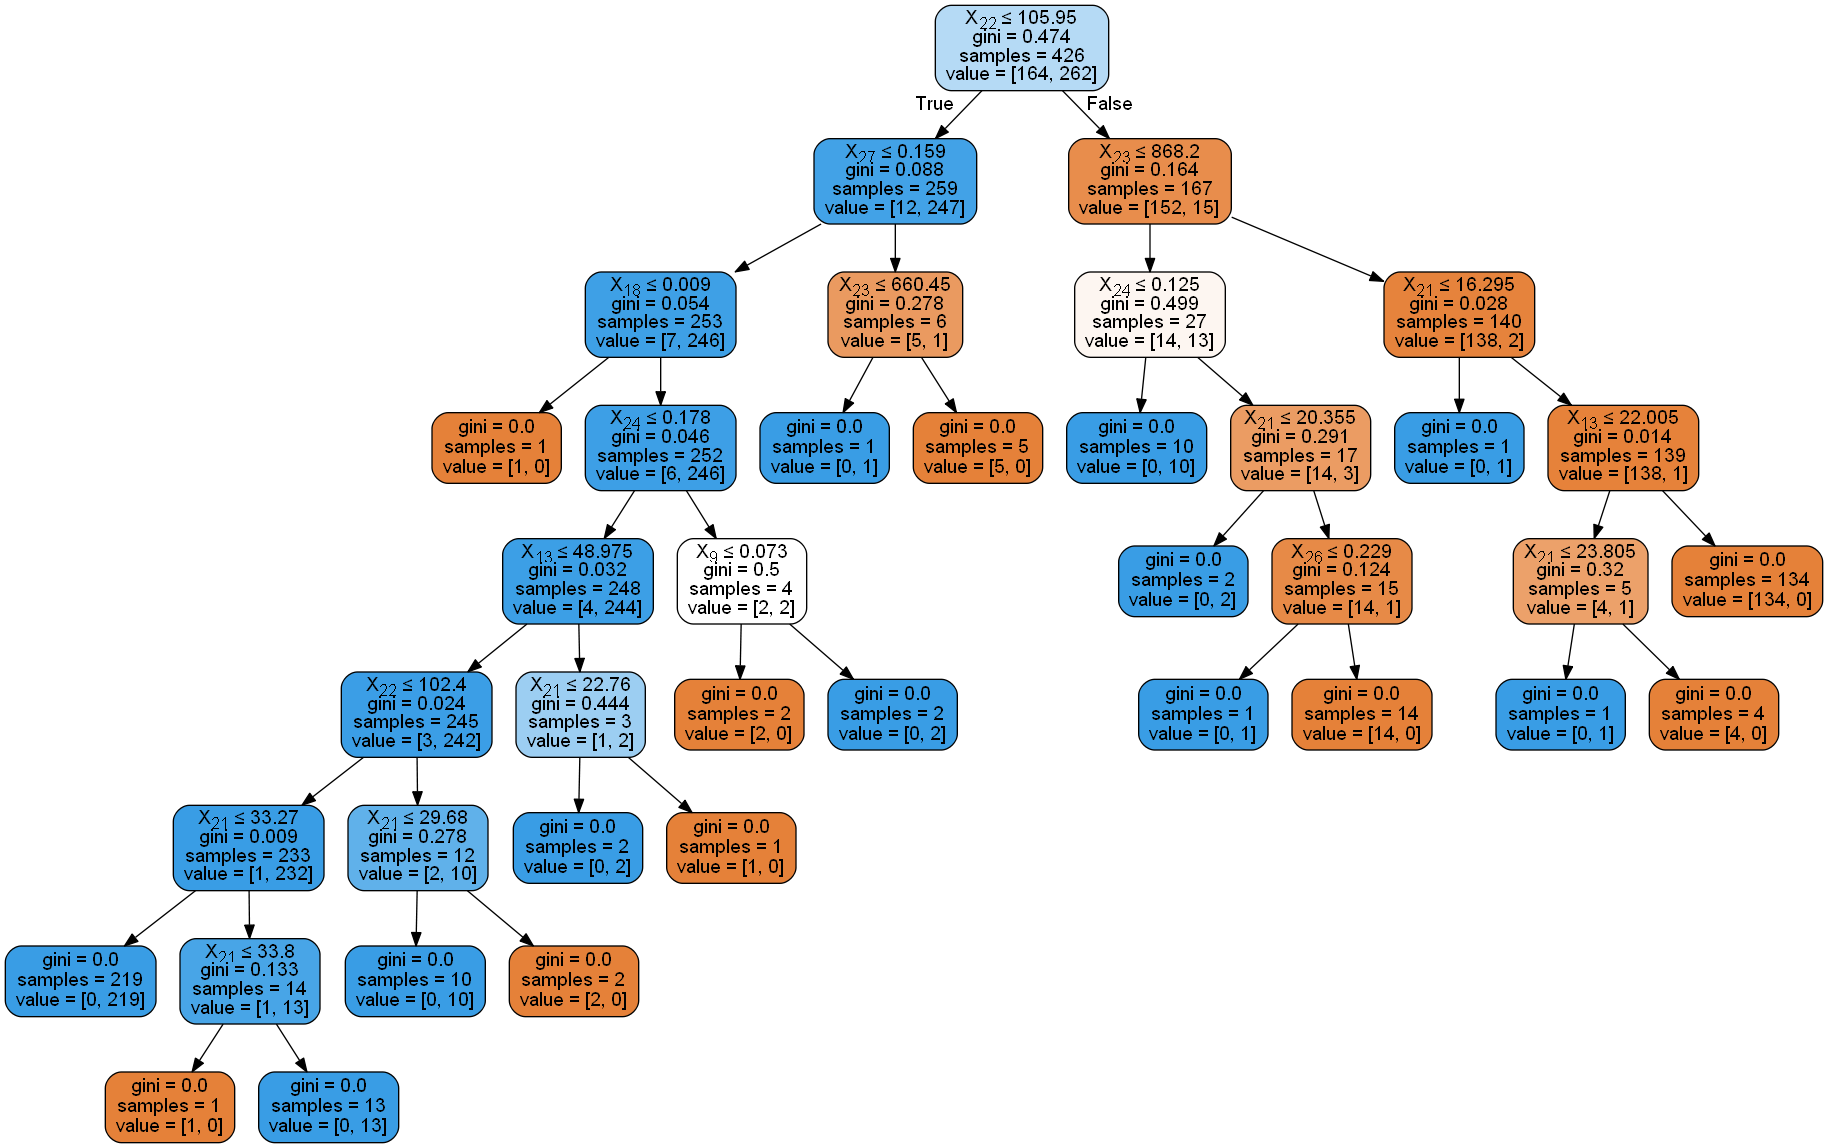

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Classifier (Breast Cancer) - Customized

In [11]:
# load breast cancer dataset
cancer = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=4)

# build decision tree
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [12]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9090909090909091


In [13]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [14]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.00822758 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00512535 0.         0.         0.00959885 0.
 0.         0.         0.         0.02587449 0.77922541 0.05938112
 0.05339507 0.         0.         0.04941031 0.         0.00976183]


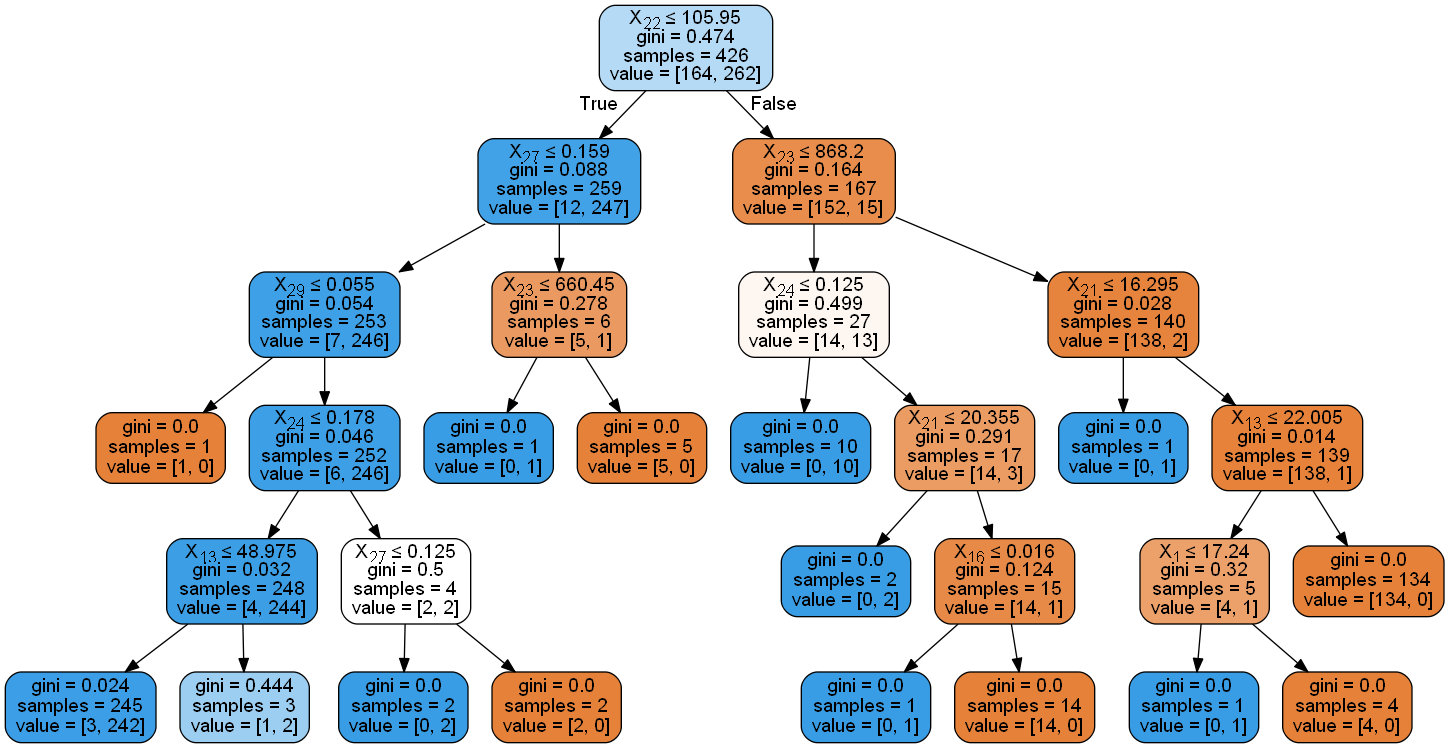

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

> Limiting max depth improves accuracy, the original tree classifier has overfitted.